In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
sns.set_style('whitegrid')

In [3]:
train = pd.read_csv('../input/training.csv')
test = pd.read_csv('../input/test.csv')

In [4]:
train.drop(axis=1, labels='Image').head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
left_eye_center_x            7039 non-null float64
left_eye_center_y            7039 non-null float64
right_eye_center_x           7036 non-null float64
right_eye_center_y           7036 non-null float64
left_eye_inner_corner_x      2271 non-null float64
left_eye_inner_corner_y      2271 non-null float64
left_eye_outer_corner_x      2267 non-null float64
left_eye_outer_corner_y      2267 non-null float64
right_eye_inner_corner_x     2268 non-null float64
right_eye_inner_corner_y     2268 non-null float64
right_eye_outer_corner_x     2268 non-null float64
right_eye_outer_corner_y     2268 non-null float64
left_eyebrow_inner_end_x     2270 non-null float64
left_eyebrow_inner_end_y     2270 non-null float64
left_eyebrow_outer_end_x     2225 non-null float64
left_eyebrow_outer_end_y     2225 non-null float64
right_eyebrow_inner_end_x    2270 non-null float64
right_eyebrow_inner_end_y 

In [6]:
train.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,7039.000000,7039.000000,7036.000000,7036.000000,2271.000000,2271.000000,2267.000000,2267.000000,2268.000000,2268.000000,...,7049.000000,7049.000000,2269.000000,2269.000000,2270.000000,2270.000000,2275.000000,2275.000000,7016.000000,7016.000000
mean,66.359021,37.651234,30.306102,37.976943,59.159339,37.944752,73.330478,37.707008,36.652607,37.989902,...,48.374186,62.715884,63.285735,75.970714,32.900404,76.179768,47.975412,72.919443,48.569472,78.970146
std,3.448233,3.152926,3.083230,3.033621,2.690354,2.307332,3.405852,2.881438,2.350268,2.311907,...,4.280038,5.720567,4.079063,4.579724,3.964552,4.417814,3.323060,5.222500,4.269961,5.407844
min,22.763345,1.616512,0.686592,4.091264,19.064954,27.190098,27.571879,26.250023,5.751046,26.250023,...,12.944699,17.932414,22.923362,57.023258,2.245766,56.690208,12.605173,56.719043,12.536477,25.850503
25%,65.082895,35.900451,28.783339,36.327681,58.039339,36.626283,71.716503,36.085523,35.506126,36.766783,...,46.602370,59.292697,61.257143,72.875707,30.797646,73.256472,46.494571,69.396748,46.573703,75.549715
50%,66.497566,37.528055,30.251378,37.813273,59.304615,37.878040,73.247824,37.639015,36.651562,37.944075,...,48.424713,63.451421,63.178286,75.778689,32.982305,76.000592,47.905490,72.605173,48.594978,78.696326
75%,68.024752,39.258449,31.768334,39.566729,60.519810,39.260348,75.015645,39.373489,37.753571,39.192917,...,50.330437,66.492686,65.376243,78.879123,35.101302,78.956357,49.296488,76.221644,50.677631,82.233993
max,94.689280,80.502649,85.039381,81.270911,84.440991,66.562559,95.258090,64.618230,70.714966,69.808803,...,89.438592,95.935644,84.767123,94.673637,74.017993,95.510678,83.989082,94.548359,89.438592,95.808983


In [7]:
image_size = 96 # 96x96
half_size = image_size / 2

In [8]:
def format_image(raw):
    return np.array(list(map(float, raw.split())))

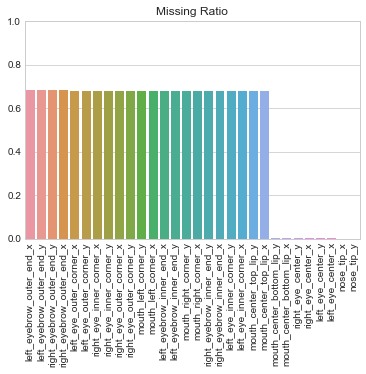

In [11]:
missing_ratio = 1 - train.drop('Image', axis=1).count()/train.shape[0]
missing_ratio = missing_ratio.sort_values(ascending=False)
missing_ratio

g = sns.barplot(x=missing_ratio.index, y=missing_ratio.values)
_ = g.set_title('Missing Ratio')
_ = g.set_xticklabels(rotation=90, labels=missing_ratio.index)
_ = g.set_ylim(0,1)

## Baseline - Single model

Start with training all points in the same model. Objective is to find a CNN architecture that works decent. Later it can be evaluated if what is best, 15 separate models predicting points (each model outputs x and y) or if is better to do 30 models (where models output x or y)

In [12]:
all_points = train.copy()
all_points.dropna(axis=0, inplace=True)
all_points.isnull().any()

left_eye_center_x            False
left_eye_center_y            False
right_eye_center_x           False
right_eye_center_y           False
left_eye_inner_corner_x      False
left_eye_inner_corner_y      False
left_eye_outer_corner_x      False
left_eye_outer_corner_y      False
right_eye_inner_corner_x     False
right_eye_inner_corner_y     False
right_eye_outer_corner_x     False
right_eye_outer_corner_y     False
left_eyebrow_inner_end_x     False
left_eyebrow_inner_end_y     False
left_eyebrow_outer_end_x     False
left_eyebrow_outer_end_y     False
right_eyebrow_inner_end_x    False
right_eyebrow_inner_end_y    False
right_eyebrow_outer_end_x    False
right_eyebrow_outer_end_y    False
nose_tip_x                   False
nose_tip_y                   False
mouth_left_corner_x          False
mouth_left_corner_y          False
mouth_right_corner_x         False
mouth_right_corner_y         False
mouth_center_top_lip_x       False
mouth_center_top_lip_y       False
mouth_center_bottom_

In [13]:
X = all_points['Image'].apply(lambda i: format_image(i)).values
X = np.concatenate(X).ravel().reshape(-1, image_size, image_size, 1)/255.
Y = (all_points.drop(labels='Image', axis=1).values - half_size)/half_size

In [16]:
def show_image(x, y_act=[], y_pred=[]):
    
    act_x = y_act[::2]
    act_y = y_act[1::2]
    
    pred_x = y_pred[::2]
    pred_y = y_pred[1::2]
    
    print(x.shape)
    
    plt.imshow(x.reshape(image_size, image_size), interpolation='nearest', cmap='Greys_r')
    plt.scatter(x=act_x, y=act_y, c='lime')
    plt.scatter(x=pred_x, y=pred_y, c='red')

(96, 96, 1)


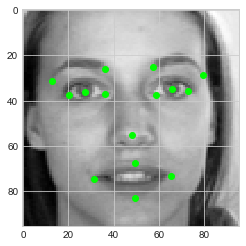

In [15]:
show_image(X[8], y_act=Y[8]*half_size+half_size)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=101)

In [19]:
X_train.shape

(1712, 96, 96, 1)

In [1]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, MaxPool2D, Conv2D, Activation, Input, UpSampling2D
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

C:\Users\Administrator\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [22]:
input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3])
output_shape = Y_train.shape[1]

In [23]:
# Custom loss - Mean squared error rescaled to display loss with original scale for y
def mse(y_true, y_pred):
    
    rescale_true = y_true*half_size + half_size
    rescale_pred = y_pred*half_size + half_size
    
    return K.mean(K.square(rescale_true - rescale_pred), axis=-1)

### Network

Custom network resembling VGG. Servers as a baseline.

In [31]:
def create_cnn(output_shape=2, reload_weights = False, custom_metrics=[]):
    
    model = Sequential()
    model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'same', activation ='relu', input_shape = input_shape))
    model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'same', activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'same', activation ='relu'))
    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'same', activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256, activation = "relu"))
    model.add(Dropout(0.5)) 
    model.add(Dense(output_shape))
    
    learning_rate = 0.0001
    
    if reload_weights:
        learning_rate = 0.00001
        model.load_weights('single_point_best_val.h5')
        
    optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
    model.compile(loss=mse, optimizer=optimizer, metrics=custom_metrics)
    
    return model

In [36]:
model = create_cnn(output_shape)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 96, 96, 32)        832       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 96, 96, 32)        25632     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 48, 48, 64)        18496     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 48, 48, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 24, 24, 64)        0         
__________

In [38]:
learning_rate_reduction = ReduceLROnPlateau(monitor='loss', patience=3, verbose=1, factor=0.5)

early_stopping = EarlyStopping(monitor='loss', patience=6, verbose=1)

checkpoint = ModelCheckpoint('one_fits_all_best_val.h5', monitor='val_loss', save_best_only=True)

In [39]:
epochs = 100
batch_size = 64

hist = model.fit(X_train, 
                 Y_train, 
                 validation_data=[X_val, Y_val], 
                 shuffle=True,  
                 batch_size=batch_size,
                 epochs=epochs,
                 callbacks=[learning_rate_reduction, early_stopping, checkpoint], 
                 verbose=1)

Train on 1712 samples, validate on 428 samples
Epoch 1/100
1712/1712 [==============================] - 92s 54ms/step - loss: 1723.1604 - val_loss: 46.8547

In [44]:
model.load_weights('one_fits_all_best_val.h5')

In [45]:
Y_pred = model.predict(X_val)

In [46]:
from sklearn.metrics import mean_squared_error

In [47]:
mean_squared_error(Y_val*half_size+half_size, Y_pred*half_size+half_size)

2.2649133127473795

In [48]:
rescaled_val = Y_val*half_size+half_size
rescaled_pred = Y_pred*half_size+half_size

errors = []

for i in range(rescaled_pred.shape[1]):
    errors.append(mean_squared_error(rescaled_val[:,i], rescaled_pred[:,i]))

list(zip(train.columns, map("{:.3f}".format, errors)))

[('left_eye_center_x', '1.386'),
 ('left_eye_center_y', '1.080'),
 ('right_eye_center_x', '1.411'),
 ('right_eye_center_y', '1.124'),
 ('left_eye_inner_corner_x', '1.358'),
 ('left_eye_inner_corner_y', '1.013'),
 ('left_eye_outer_corner_x', '1.931'),
 ('left_eye_outer_corner_y', '1.358'),
 ('right_eye_inner_corner_x', '1.337'),
 ('right_eye_inner_corner_y', '1.014'),
 ('right_eye_outer_corner_x', '1.729'),
 ('right_eye_outer_corner_y', '1.370'),
 ('left_eyebrow_inner_end_x', '2.279'),
 ('left_eyebrow_inner_end_y', '1.987'),
 ('left_eyebrow_outer_end_x', '2.813'),
 ('left_eyebrow_outer_end_y', '3.517'),
 ('right_eyebrow_inner_end_x', '2.973'),
 ('right_eyebrow_inner_end_y', '2.332'),
 ('right_eyebrow_outer_end_x', '2.796'),
 ('right_eyebrow_outer_end_y', '3.655'),
 ('nose_tip_x', '3.090'),
 ('nose_tip_y', '3.040'),
 ('mouth_left_corner_x', '3.072'),
 ('mouth_left_corner_y', '2.787'),
 ('mouth_right_corner_x', '2.934'),
 ('mouth_right_corner_y', '2.416'),
 ('mouth_center_top_lip_x', '1.6

(96, 96, 1)


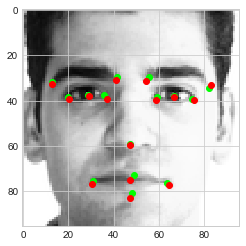

In [49]:
index = 4
show_image(X_val[index], y_act=Y_val[index]*half_size+half_size, y_pred = Y_pred[index]*half_size+half_size)

## Conclusions

The "one-fits-all" model was waaaay more competitive than I expected. The points are already in good positions for most images. It might have gotten even better with some longer training, but probably not much. But maybe it can be improved/supplemented with specialist models or emsamble models.

Could problably be improved further by: 
    - Replacing missing points with prediction which would open up more training data.
    - Performing data augmentation

In [50]:
model.save('one_fits_all.h5')

## Ensamble - One model per point

Evalutate the performance of models that learn a single point (x and y). The is that a network will find it easy to train x and y for a point at the same time since they are related. Also, see if there is any point at all in using specialist models for this task

In [51]:
# prepare a single point for training
def prepare_training_point(train, point_index):

    x_index = point_index*2
    y_index = x_index + 1
    
    train_point = train.iloc[:,[x_index, y_index, -1]].copy()
    train_point.dropna(axis=0, inplace=True)
    train_point.isnull().any()

    X = train_point['Image'].apply(lambda i: format_image(i)).values
    X = np.concatenate(X).ravel().reshape(-1, image_size, image_size, 1)/255.
    Y = (train_point.drop(labels='Image', axis=1).values - half_size)/half_size

    X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=101)
    
    return X_train, X_val, Y_train, Y_val

In [52]:
X_train, X_val, Y_train, Y_val = prepare_training_point(train, 14)

In [53]:
# Euclidian distance - an alternative loss and metric when working with points
def ed(y_true, y_pred):
    
    rescale_true = y_true*half_size + half_size
    rescale_pred = y_pred*half_size + half_size
    
    return K.sqrt(K.sum(K.square(rescale_true - rescale_pred), axis=-1, keepdims=True))

In [54]:
model = create_cnn(Y_train.shape[1], custom_metrics=[ed])

In [55]:
learning_rate_reduction = ReduceLROnPlateau(monitor='loss', patience=3, verbose=1, factor=0.5)

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

checkpoint = ModelCheckpoint('single_point_best_val.h5', monitor='val_loss', save_best_only=True)

In [56]:
epochs = 100
batch_size = 64

hist = model.fit(X_train, 
                 Y_train, 
                 validation_data=[X_val, Y_val], 
                 shuffle=True,  
                 batch_size=batch_size,
                 epochs=epochs,
                 callbacks=[learning_rate_reduction, early_stopping], 
                 verbose=1)

Train on 5612 samples, validate on 1404 samples
Epoch 1/100
5612/5612 [==============================] - 294s 52ms/step - loss: 91412.5528 - ed: 59.6100 - val_loss: 104.8916 - val_ed: 13.5251

KeyboardInterrupt: 

In [226]:
Y_pred = model.predict(X_val)

In [227]:
mean_squared_error(Y_val*half_size+half_size, Y_pred*half_size+half_size)

7.296192173924311

In [228]:
def mean_euclidian_distance(y_true, y_pred):
    return np.mean(np.sqrt(np.sum(np.square(y_true - y_pred), axis=-1)))

In [229]:
mean_euclidian_distance(Y_val*half_size+half_size, Y_pred*half_size+half_size)

2.4728784071202514

(96, 96, 1)


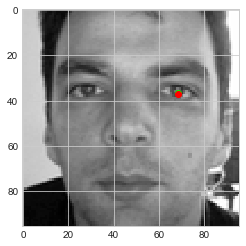

In [230]:
index = 4
show_image(X_val[index], y_act=Y_val[index]*half_size+half_size, y_pred = Y_pred[index]*half_size+half_size)

In [231]:
model.save('single_point.h5')

In [ ]:
epochs = 50
batch_size = 64

trained_models = []
mses = []
eds = []

for i in range(15):
    
    X_train, X_val, Y_train, Y_val = prepare_training_point(train, i)
    
    model = create_cnn(Y_train.shape[1])
    
    model.fit(X_train, 
                 Y_train, 
                 validation_data=[X_val, Y_val], 
                 shuffle=True,  
                 batch_size=batch_size,
                 epochs=epochs,
                 callbacks=[learning_rate_reduction, early_stopping], 
                 verbose=0)
    
    
    Y_pred = new_model.predict(X_val)
    
    mses.append(mean_squared_error(Y_val*half_size+half_size, Y_pred*half_size+half_size))
    eds.append(mean_euclidian_distance(Y_val*half_size+half_size, Y_pred*half_size+half_size))
    trained_models.append(model)
    
    print('Finished point: ', 
          i,
          ' with loss: ', 
          mean_squared_error(Y_val*half_size+half_size, Y_pred*half_size+half_size),
          ' with ed: ', 
          mean_euclidian_distance(Y_val*half_size+half_size, Y_pred*half_size+half_size)
         )  